In [1]:
%matplotlib inline
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import requests
import csv
import play_scraper as gp
from pprint import pprint


In [2]:
# a complete list of categories for the google play store
categories = ["GAME_ACTION", "GAME_ADVENTURE",
              "GAME_ARCADE", "GAME_BOARD", 
              "GAME_CARD", "GAME_CASINO",
              "GAME_CASUAL", "GAME_EDUCATIONAL",
              "GAME_MUSIC",  "GAME_PUZZLE",
              "GAME_RACING", "GAME_ROLE_PLAYING",
              "GAME_SIMULATION", "GAME_SPORTS",
              "GAME_STRATEGY", "GAME_TRIVIA",
              "GAME_WORD"]

# Empty lists to put the game id (and game category for later).
game_category = []
game_list = []

# Grabs a list of the top 25 paid games in each category.
for x in categories:
    paid_games = gp.collection(collection='TOP_PAID', category=x, results=25)
    print(f' --')
    print(f'   *** Getting information for games in the {x} category. ***')
    print(f' --')
    for j in range (0, 25):
        game_info = paid_games[j]['app_id']
        title = paid_games[j]['title']
        game_category.append(x)
        game_list.append(game_info)
        print(f'{j}. Getting the Game ID for {title}.')
print(f' --')
print(f'All done! The loop collected a total of {len(game_list)} game titles.')
print(f' --')

 --
   *** Getting information for games in the GAME_ACTION category. ***
 --
0. Getting the Game ID for Grand Theft Auto: San Andreas.
1. Getting the Game ID for Five Nights at Freddy's.
2. Getting the Game ID for Hitman Sniper.
3. Getting the Game ID for Five Nights at Freddy's: SL.
4. Getting the Game ID for Assassin's Creed Identity.
5. Getting the Game ID for Space Marshals.
6. Getting the Game ID for Five Nights at Freddy's 4.
7. Getting the Game ID for Grand Theft Auto III.
8. Getting the Game ID for Call of Duty:Black Ops Zombies.
9. Getting the Game ID for truTV Impractical Jokers Wheel of Doom.
10. Getting the Game ID for Five Nights at Freddy's 3.
11. Getting the Game ID for Real Steel.
12. Getting the Game ID for Teen Titans GO Figure!.
13. Getting the Game ID for Downwell.
14. Getting the Game ID for Bully: Anniversary Edition.
15. Getting the Game ID for Bloons Supermonkey 2.
16. Getting the Game ID for Shadow of Death: Stickman Fighting - Dark Knight.
17. Getting the Gam

 --
   *** Getting information for games in the GAME_EDUCATIONAL category. ***
 --
0. Getting the Game ID for Wonderland : Peter Pan.
1. Getting the Game ID for Teach Your Monster to Read - Phonics and Reading.
2. Getting the Game ID for Toca Boo.
3. Getting the Game ID for Toca Blocks.
4. Getting the Game ID for Explore Daniel's Neighborhood.
5. Getting the Game ID for My Town : Hospital.
6. Getting the Game ID for My Town : Airport.
7. Getting the Game ID for Wonderland : Little Mermaid.
8. Getting the Game ID for Toca Mystery House.
9. Getting the Game ID for Peppa Pig: Holiday.
10. Getting the Game ID for Toca Lab: Plants.
11. Getting the Game ID for Daniel Tiger's Stop & Go Potty.
12. Getting the Game ID for My City : Office.
13. Getting the Game ID for Learn to Read with Tommy Turtle.
14. Getting the Game ID for My Town : School.
15. Getting the Game ID for Stack the States® 2.
16. Getting the Game ID for BRIO World - Railway.
17. Getting the Game ID for Numberblocks - Hide and S

 --
   *** Getting information for games in the GAME_STRATEGY category. ***
 --
0. Getting the Game ID for Bloons TD 6.
1. Getting the Game ID for Bloons TD 5.
2. Getting the Game ID for Kingdom Rush Vengeance.
3. Getting the Game ID for Papa's Freezeria To Go!.
4. Getting the Game ID for Rusted Warfare - RTS Strategy.
5. Getting the Game ID for Five Nights at Freddy's 2.
6. Getting the Game ID for ROME: Total War.
7. Getting the Game ID for Age of Civilizations II.
8. Getting the Game ID for The Escapists: Prison Escape.
9. Getting the Game ID for First Strike: Final Hour.
10. Getting the Game ID for Civilization Revolution 2.
11. Getting the Game ID for Papa's Scooperia To Go!.
12. Getting the Game ID for Kingdom Rush Frontiers.
13. Getting the Game ID for Papa's Burgeria To Go!.
14. Getting the Game ID for XCOM®: Enemy Within.
15. Getting the Game ID for Uciana.
16. Getting the Game ID for Papa's Pancakeria To Go!.
17. Getting the Game ID for Papa's Pizzeria To Go!.
18. Getting the 

In [3]:
print(len(game_list))

425


In [4]:
# Empty lists to store the information we want
game_titles = []
game_scores = []
game_reviews = []
game_prices = []
game_installs = []
game_developers = []
game_urls = []

# Loops through the game id's that we gathered in the loop above and puts it into the lists we created 
i = 0
for game in game_list:
    game_details = gp.details(game_list[i])
    title_info = game_details['title']
    game_titles.append(title_info)
    game_scores.append(game_details['score'])
    game_reviews.append(game_details['reviews'])
    game_prices.append(game_details['price'])
    game_installs.append(game_details['installs'])
    game_developers.append(game_details['developer'])
    game_urls.append(game_details['url'])
    print(f'Getting information for {title_info}.')
    i += 1
print(f'All done! The loop processed a total of {len(game_titles)} results.')

Getting information for Grand Theft Auto: San Andreas.
Getting information for Five Nights at Freddy's.
Getting information for Hitman Sniper.
Getting information for Five Nights at Freddy's: SL.
Getting information for Assassin's Creed Identity.
Getting information for Space Marshals.
Getting information for Five Nights at Freddy's 4.
Getting information for Grand Theft Auto III.
Getting information for Call of Duty:Black Ops Zombies.
Getting information for truTV Impractical Jokers Wheel of Doom.
Getting information for Five Nights at Freddy's 3.
Getting information for Real Steel.
Getting information for Teen Titans GO Figure!.
Getting information for Downwell.
Getting information for Bully: Anniversary Edition.
Getting information for Bloons Supermonkey 2.
Getting information for Shadow of Death: Stickman Fighting - Dark Knight.
Getting information for LEGO® Star Wars™:  TCS.
Getting information for GTA: Chinatown Wars.
Getting information for LEGO ® Marvel Super Heroes.
Getting in

Getting information for My Town : Airport.
Getting information for Wonderland : Little Mermaid.
Getting information for Toca Mystery House.
Getting information for Peppa Pig: Holiday.
Getting information for Toca Lab: Plants.
Getting information for Daniel Tiger's Stop & Go Potty.
Getting information for My City : Office.
Getting information for Learn to Read with Tommy Turtle.
Getting information for My Town : School.
Getting information for Stack the States® 2.
Getting information for BRIO World - Railway.
Getting information for Numberblocks - Hide and Seek.
Getting information for Dr. Panda Restaurant 2.
Getting information for My Town : Best Friends' House.
Getting information for Second Grade Learning Games.
Getting information for My Town : ICEME Amusement Park.
Getting information for My City : Dentist visit.
Getting information for My Town : Hotel.
Getting information for PAW Patrol Air and Sea Adventures.
Getting information for Cytus II.
Getting information for Incredibox.
G

Getting information for XCOM®: Enemy Within.
Getting information for Uciana.
Getting information for Papa's Pancakeria To Go!.
Getting information for Papa's Pizzeria To Go!.
Getting information for Dungeon Maker.
Getting information for Kingdom Rush Origins.
Getting information for Door Kickers.
Getting information for Teeny Titans - Teen Titans Go!.
Getting information for Papa's Taco Mia To Go!.
Getting information for Organ Trail: Director's Cut.
Getting information for Warhammer 40,000: Regicide.
Getting information for Trivia Crack (No Ads).
Getting information for Sporcle.
Getting information for BLeBRiTY.
Getting information for The Jackbox Party Pack.
Getting information for The Jackbox Party Pack 5.
Getting information for The Jackbox Party Pack 3.
Getting information for The 7 Second Challenge.
Getting information for The Jackbox Party Pack 2.
Getting information for Bible Bowl Prep 2019.
Getting information for The Black Card Game.
Getting information for 4 Player Reactor (

In [5]:
# Combines the lists above into a nice, tidy data frame
games_master = {
    "Game Title": game_titles,
    "Game Category": game_category,
    "Game Score": game_scores,
    "Number of Reviews": game_reviews,
    "Price": game_prices,
    "Number of Installs": game_installs,
    "Developer": game_developers,
    "Play Store URL": game_urls
    
}
games_df = pd.DataFrame(games_master)
games_df.head(50)

,Game Title,Game Category,Game Score,Number of Reviews,Price,Number of Installs,Developer,Play Store URL
0,Grand Theft Auto: San Andreas,GAME_ACTION,4.3,387831,$6.99,"1,000,000+",Rockstar Games,https://play.google.com/store/apps/details?id=...
1,Five Nights at Freddy's,GAME_ACTION,4.6,103823,$2.99,"1,000,000+",Scott Cawthon,https://play.google.com/store/apps/details?id=...
2,Hitman Sniper,GAME_ACTION,4.6,592059,$0.99,"10,000,000+",SQUARE ENIX Ltd,https://play.google.com/store/apps/details?id=...
3,Five Nights at Freddy's: SL,GAME_ACTION,4.5,17363,$2.99,"100,000+",Scott Cawthon,https://play.google.com/store/apps/details?id=...
4,Assassin's Creed Identity,GAME_ACTION,3.8,50015,$1.99,"500,000+",Ubisoft Entertainment,https://play.google.com/store/apps/details?id=...
5,Space Marshals,GAME_ACTION,4.8,7921,$0.99,"50,000+",Pixelbite,https://play.google.com/store/apps/details?id=...
6,Five Nights at Freddy's 4,GAME_ACTION,4.6,21575,$2.99,"100,000+",Scott Cawthon,https://play.google.com/store/apps/details?id=...
7,Grand Theft Auto III,GAME_ACTION,4.0,96667,$4.99,"1,000,000+",Rockstar Games,https://play.google.com/store/apps/details?id=...
8,Call of Duty:Black Ops Zombies,GAME_ACTION,4.2,14005,$6.99,"100,000+","Activision Publishing, Inc.",https://play.google.com/store/apps/details?id=...
9,truTV Impractical Jokers Wheel of Doom,GAME_ACTION,4.3,168,$2.99,"5,000+",truTVnetwork,https://play.google.com/store/apps/details?id=...


In [6]:
# check the data types
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 8 columns):
Game Title            425 non-null object
Game Category         425 non-null object
Game Score            417 non-null object
Number of Reviews     425 non-null int64
Price                 425 non-null object
Number of Installs    425 non-null object
Developer             425 non-null object
Play Store URL        425 non-null object
dtypes: int64(1), object(7)
memory usage: 26.6+ KB


In [7]:
# Cleans up and formats the data
games_df['Number of Installs'] = games_df['Number of Installs'].str.replace('+', '')
games_df['Number of Installs'] = games_df['Number of Installs'].str.replace(',', '')
games_df['Number of Installs'] = pd.to_numeric(games_df['Number of Installs'], errors='coerce')
games_df['Game Score'] = pd.to_numeric(games_df['Game Score'], errors='coerce')
games_df['Price'] = games_df['Price'].str.replace('$', '')
games_df['Price'] = pd.to_numeric(games_df['Price'], errors='coerce')
games_df.head()

,Game Title,Game Category,Game Score,Number of Reviews,Price,Number of Installs,Developer,Play Store URL
0,Grand Theft Auto: San Andreas,GAME_ACTION,4.3,387831,6.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...
1,Five Nights at Freddy's,GAME_ACTION,4.6,103823,2.99,1000000,Scott Cawthon,https://play.google.com/store/apps/details?id=...
2,Hitman Sniper,GAME_ACTION,4.6,592059,0.99,10000000,SQUARE ENIX Ltd,https://play.google.com/store/apps/details?id=...
3,Five Nights at Freddy's: SL,GAME_ACTION,4.5,17363,2.99,100000,Scott Cawthon,https://play.google.com/store/apps/details?id=...
4,Assassin's Creed Identity,GAME_ACTION,3.8,50015,1.99,500000,Ubisoft Entertainment,https://play.google.com/store/apps/details?id=...


In [8]:
games_df["Total Download Revenue ($)"] = games_df["Price"]*games_df["Number of Installs"]

In [9]:
games_df.dtypes

Game Title                     object
Game Category                  object
Game Score                    float64
Number of Reviews               int64
Price                         float64
Number of Installs              int64
Developer                      object
Play Store URL                 object
Total Download Revenue ($)    float64
dtype: object

In [10]:
#segregating the data by category from main DF

arcade_game = games_df.loc[games_df["Game Category"]=="GAME_ARCADE"]
sports_game = games_df.loc[games_df["Game Category"]=="GAME_SPORTS"]
racing_game = games_df.loc[games_df["Game Category"]=="GAME_RACING"]
music_game = games_df.loc[games_df["Game Category"]=="GAME_MUSIC"]
educational_game = games_df.loc[games_df["Game Category"]== "GAME_EDUCATIONAL"]
board_game = games_df.loc[games_df["Game Category"]=="GAME_BOARD"]
casino_game = games_df.loc[games_df["Game Category"]=="GAME_CASINO"]
action_game = games_df.loc[games_df["Game Category"]=="GAME_ACTION"]
trivia_game = games_df.loc[games_df["Game Category"]=="GAME_TRIVIA"]
simulation_game = games_df.loc[games_df["Game Category"]=="GAME_SIMULATION"]
adventure_game = games_df.loc[games_df["Game Category"]=="GAME_ADVENTURE"]
puzzle_game = games_df.loc[games_df["Game Category"]=="GAME_PUZZLE"]
card_game = games_df.loc[games_df["Game Category"]=="GAME_CARD"]
casual_game = games_df.loc[games_df["Game Category"]=="GAME_CASUAL"]
strategy_game = games_df.loc[games_df["Game Category"]=="GAME_STRATEGY"]                       
roleplay_game = games_df.loc[games_df["Game Category"]=="GAME_ROLE_PLAYING"]
word_game = games_df.loc[games_df["Game Category"]=="GAME_WORD"]

In [11]:
# Although action game and arcade games receive similar amount of dls, arcade games receives 3x of
# total revenue. Therefore, based on the finding from Greg's group_sums and game_inst_sums DFs,
# it appears arcade_game generates most of the revenue out of all sub-catergories. The analysis from here will be
# focusing on arcade catergory only.

arcade_game = arcade_game.sort_values(by='Total Download Revenue ($)', ascending=False)

In [12]:
arcade_game

,Game Title,Game Category,Game Score,Number of Reviews,Price,Number of Installs,Developer,Play Store URL,Total Download Revenue ($)
50,Minecraft,GAME_ARCADE,4.5,2596217,6.99,10000000,Mojang,https://play.google.com/store/apps/details?id=...,69900000.0
52,Grand Theft Auto: Vice City,GAME_ARCADE,4.3,132113,4.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...,4990000.0
66,Worms 3,GAME_ARCADE,4.2,67903,4.99,1000000,Team 17 Digital Limited,https://play.google.com/store/apps/details?id=...,4990000.0
61,SuperRetro16 ( SNES Emulator ),GAME_ARCADE,4.3,38562,3.99,1000000,Neutron Emulation,https://play.google.com/store/apps/details?id=...,3990000.0
51,Geometry Dash,GAME_ARCADE,4.8,651438,1.99,1000000,RobTop Games,https://play.google.com/store/apps/details?id=...,1990000.0
54,ePSXe for Android,GAME_ARCADE,4.5,35066,3.75,500000,epsxe software s.l.,https://play.google.com/store/apps/details?id=...,1875000.0
74,Granny Smith,GAME_ARCADE,4.7,41911,1.99,500000,Mediocre,https://play.google.com/store/apps/details?id=...,995000.0
55,Fruit Ninja Classic,GAME_ARCADE,4.3,85893,0.99,1000000,Halfbrick Studios,https://play.google.com/store/apps/details?id=...,990000.0
57,Pocket God™,GAME_ARCADE,3.7,30428,0.99,500000,"Bolt Creative, Inc",https://play.google.com/store/apps/details?id=...,495000.0
60,Vector Full,GAME_ARCADE,4.2,35920,0.99,500000,NEKKI,https://play.google.com/store/apps/details?id=...,495000.0


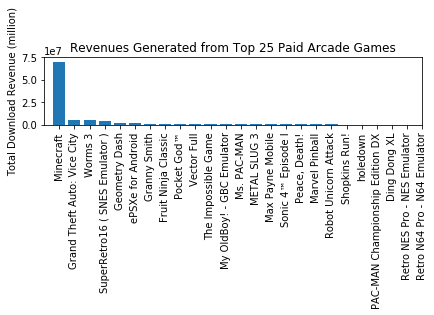

In [13]:
#bar cart by revenue.
tick_location = np.arange(len(arcade_game))
plt.bar(tick_location,arcade_game["Total Download Revenue ($)"], align="center")
plt.xticks(tick_location,arcade_game["Game Title"], rotation=90)
plt.xticks()
plt.title("Revenues Generated from Top 25 Paid Arcade Games")
plt.xlim(-1, len(arcade_game)-1)
plt.ylim(0,max(arcade_game["Total Download Revenue ($)"]+5000000))
plt.ylabel("Total Download Revenue (million)")
plt.tight_layout()

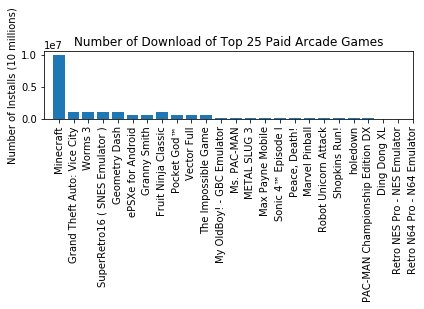

In [14]:
#bar cart by # of dl.
tick_location = np.arange(len(arcade_game))
plt.bar(tick_location,arcade_game["Number of Installs"], align="center")
plt.xticks(tick_location,arcade_game["Game Title"], rotation=90)
plt.xlim(-1, len(arcade_game)-1)
plt.ylim(0,max(arcade_game["Number of Installs"]+500000))
plt.ylabel("Number of Installs (10 millions)")
plt.title("Number of Download of Top 25 Paid Arcade Games")
plt.tight_layout()

In [15]:
# in comparsion, let's extract 3 top paid games from each catergory
top_games = games_df.groupby('Game Category', group_keys=False).apply(lambda x: x.nlargest(3, 'Total Download Revenue ($)'))

In [16]:
top_games = top_games.sort_values(by='Total Download Revenue ($)', ascending=False)
top_games

,Game Title,Game Category,Game Score,Number of Reviews,Price,Number of Installs,Developer,Play Store URL,Total Download Revenue ($)
50,Minecraft,GAME_ARCADE,4.5,2596217,6.99,10000000,Mojang,https://play.google.com/store/apps/details?id=...,69900000.0
2,Hitman Sniper,GAME_ACTION,4.6,592059,0.99,10000000,SQUARE ENIX Ltd,https://play.google.com/store/apps/details?id=...,9900000.0
0,Grand Theft Auto: San Andreas,GAME_ACTION,4.3,387831,6.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...,6990000.0
304,Goat Simulator,GAME_SIMULATION,4.3,100979,4.99,1000000,Coffee Stain Publishing,https://play.google.com/store/apps/details?id=...,4990000.0
52,Grand Theft Auto: Vice City,GAME_ARCADE,4.3,132113,4.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...,4990000.0
66,Worms 3,GAME_ARCADE,4.2,67903,4.99,1000000,Team 17 Digital Limited,https://play.google.com/store/apps/details?id=...,4990000.0
26,Terraria.,GAME_ADVENTURE,4.3,231410,4.99,1000000,505 Games Srl,https://play.google.com/store/apps/details?id=...,4990000.0
7,Grand Theft Auto III,GAME_ACTION,4.0,96667,4.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...,4990000.0
253,Need for Speed Most Wanted,GAME_RACING,3.9,44742,4.99,1000000,ELECTRONIC ARTS,https://play.google.com/store/apps/details?id=...,4990000.0
232,Monument Valley,GAME_PUZZLE,4.8,208436,3.99,1000000,ustwo games,https://play.google.com/store/apps/details?id=...,3990000.0


In [17]:
#showing the data with a scatter plot

arcade = top_games.loc[top_games["Game Category"]=="GAME_ARCADE"]
sports = top_games.loc[top_games["Game Category"]=="GAME_SPORTS"]
racing = top_games.loc[top_games["Game Category"]=="GAME_RACING"]
music = top_games.loc[top_games["Game Category"]=="GAME_MUSIC"]
educational = top_games.loc[top_games["Game Category"]== "GAME_EDUCATIONAL"]
board = top_games.loc[top_games["Game Category"]=="GAME_BOARD"]
casino = top_games.loc[top_games["Game Category"]=="GAME_CASINO"]
action = top_games.loc[top_games["Game Category"]=="GAME_ACTION"]
trivia = top_games.loc[top_games["Game Category"]=="GAME_TRIVIA"]
simulation = top_games.loc[top_games["Game Category"]=="GAME_SIMULATION"]
adventure = top_games.loc[top_games["Game Category"]=="GAME_ADVENTURE"]
puzzle = top_games.loc[top_games["Game Category"]=="GAME_PUZZLE"]
card = top_games.loc[top_games["Game Category"]=="GAME_CARD"]
casual = top_games.loc[top_games["Game Category"]=="GAME_CASUAL"]
strategy = top_games.loc[top_games["Game Category"]=="GAME_STRATEGY"]                       
roleplay = top_games.loc[top_games["Game Category"]=="GAME_ROLE_PLAYING"]
word = top_games.loc[top_games["Game Category"]=="GAME_WORD"]

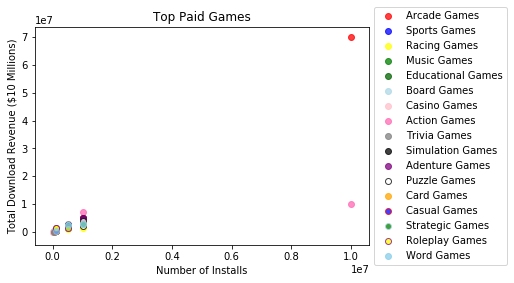

In [18]:
#building scatter plots for each category
arcade_p = plt.scatter(arcade["Number of Installs"], arcade["Total Download Revenue ($)"], marker="o"
                       , label="Arcade Games", color="red", alpha=0.75)
sports_p = plt.scatter(sports["Number of Installs"], sports["Total Download Revenue ($)"], marker="o",
                        label="Sports Games", color="blue", alpha=0.75)
racing_p = plt.scatter(racing["Number of Installs"], racing["Total Download Revenue ($)"], marker="o",
                        label="Racing Games", color="yellow", alpha=0.75)
music_p = plt.scatter(music["Number of Installs"], music["Total Download Revenue ($)"], marker="o",
                        label="Music Games", color="green", alpha=0.75)
educational_p = plt.scatter(educational["Number of Installs"], educational["Total Download Revenue ($)"],
                            marker="o",label="Educational Games", color="darkgreen", alpha=0.75)
board_p = plt.scatter(board["Number of Installs"], board["Total Download Revenue ($)"], marker="o",
                       label="Board Games", color="lightblue", alpha=0.75)
casino_p = plt.scatter(casino["Number of Installs"], casino["Total Download Revenue ($)"], marker="o",
                       label="Casino Games", color="pink", alpha=0.75)
action_p = plt.scatter(action["Number of Installs"], action["Total Download Revenue ($)"], marker="o",
                       label="Action Games", color="hotpink", alpha=0.75)
trivia_p = plt.scatter(trivia["Number of Installs"], trivia["Total Download Revenue ($)"], marker="o",
                       label="Trivia Games", color="grey", alpha=0.75)
simulation_p = plt.scatter(simulation["Number of Installs"], simulation["Total Download Revenue ($)"], marker="o",
                       label="Simulation Games", color="black", alpha=0.75)
adventure_p = plt.scatter(adventure["Number of Installs"], adventure["Total Download Revenue ($)"], marker="o",
                       label="Adenture Games", color="purple", alpha=0.75)
puzzle_p = plt.scatter(puzzle["Number of Installs"], puzzle["Total Download Revenue ($)"], marker="o",
                        label="Puzzle Games", color="white", edgecolor="black",alpha=0.75)
card_p = plt.scatter(card["Number of Installs"], card["Total Download Revenue ($)"], marker="o",
                       label="Card Games", color="orange", alpha=0.75)
casual_p = plt.scatter(casual["Number of Installs"], casual["Total Download Revenue ($)"], marker="o",
                       label="Casual Games", color="blue",edgecolor="red", alpha=0.75)
strategy_p = plt.scatter(strategy["Number of Installs"], strategy["Total Download Revenue ($)"], marker="o",
                       label="Strategic Games", color="green", edgecolor="lightblue", alpha=0.75)
roleplay_p = plt.scatter(roleplay["Number of Installs"], roleplay["Total Download Revenue ($)"], marker="o",
                       label="Roleplay Games", color="yellow", edgecolor="purple", alpha=0.75)
word_p = plt.scatter(word["Number of Installs"], word["Total Download Revenue ($)"], marker="o",
                       label="Word Games", color="skyblue", alpha=0.75)

#labeling the graph
plt.xlabel("Number of Installs")
plt.ylabel("Total Download Revenue ($10 Millions)")
plt.title("Top Paid Games")
#plt.legend((arcade_p,sports_p,racing_p,music_p,educational_p,board_p,casino_p,action_p,trivia_p,simulation_p,
           #adventure_p,puzzle_p,card_p,casual_p,strategy_p,roleplay_p,word_p),
           #("Arcade","Sports","Racing","Music","Education","Board","Casino","Action","Trivia","Simulation",
           #"Adventure","Puzzle","Card","Casual","Strategic","Roleplay","Word"))
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

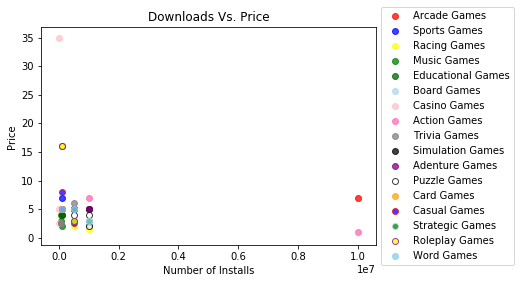

In [19]:
#building scatter plots for each category
arcade_p = plt.scatter(arcade["Number of Installs"], arcade["Price"], marker="o"
                       , label="Arcade Games", color="red", alpha=0.75)
sports_p = plt.scatter(sports["Number of Installs"], sports["Price"], marker="o",
                        label="Sports Games", color="blue", alpha=0.75)
racing_p = plt.scatter(racing["Number of Installs"], racing["Price"], marker="o",
                        label="Racing Games", color="yellow", alpha=0.75)
music_p = plt.scatter(music["Number of Installs"], music["Price"], marker="o",
                        label="Music Games", color="green", alpha=0.75)
educational_p = plt.scatter(educational["Number of Installs"], educational["Price"],
                            marker="o",label="Educational Games", color="darkgreen", alpha=0.75)
board_p = plt.scatter(board["Number of Installs"], board["Price"], marker="o",
                       label="Board Games", color="lightblue", alpha=0.75)
casino_p = plt.scatter(casino["Number of Installs"], casino["Price"], marker="o",
                       label="Casino Games", color="pink", alpha=0.75)
action_p = plt.scatter(action["Number of Installs"], action["Price"], marker="o",
                       label="Action Games", color="hotpink", alpha=0.75)
trivia_p = plt.scatter(trivia["Number of Installs"], trivia["Price"], marker="o",
                       label="Trivia Games", color="grey", alpha=0.75)
simulation_p = plt.scatter(simulation["Number of Installs"], simulation["Price"], marker="o",
                       label="Simulation Games", color="black", alpha=0.75)
adventure_p = plt.scatter(adventure["Number of Installs"], adventure["Price"], marker="o",
                       label="Adenture Games", color="purple", alpha=0.75)
puzzle_p = plt.scatter(puzzle["Number of Installs"], puzzle["Price"], marker="o",
                        label="Puzzle Games", color="white", edgecolor="black",alpha=0.75)
card_p = plt.scatter(card["Number of Installs"], card["Price"], marker="o",
                       label="Card Games", color="orange", alpha=0.75)
casual_p = plt.scatter(casual["Number of Installs"], casual["Price"], marker="o",
                       label="Casual Games", color="blue",edgecolor="red", alpha=0.75)
strategy_p = plt.scatter(strategy["Number of Installs"], strategy["Price"], marker="o",
                       label="Strategic Games", color="green", edgecolor="lightblue", alpha=0.75)
roleplay_p = plt.scatter(roleplay["Number of Installs"], roleplay["Price"], marker="o",
                       label="Roleplay Games", color="yellow", edgecolor="purple", alpha=0.75)
word_p = plt.scatter(word["Number of Installs"], word["Price"], marker="o",
                       label="Word Games", color="skyblue", alpha=0.75)

#labeling the graph
plt.xlabel("Number of Installs")
plt.ylabel("Price")
plt.title("Downloads Vs. Price")
#plt.legend((arcade_p,sports_p,racing_p,music_p,educational_p,board_p,casino_p,action_p,trivia_p,simulation_p,
           #adventure_p,puzzle_p,card_p,casual_p,strategy_p,roleplay_p,word_p),
           #("Arcade","Sports","Racing","Music","Education","Board","Casino","Action","Trivia","Simulation",
           #"Adventure","Puzzle","Card","Casual","Strategic","Roleplay","Word"))
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))










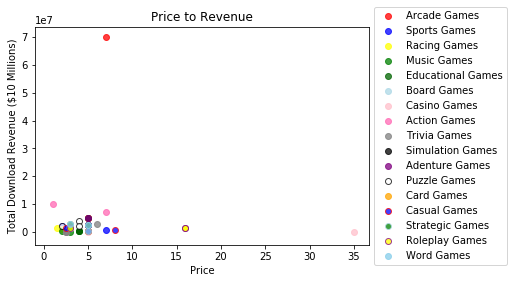

In [20]:
#building scatter plots for each category
arcade_p = plt.scatter(arcade["Price"], arcade["Total Download Revenue ($)"], marker="o"
                       , label="Arcade Games", color="red", alpha=0.75)
sports_p = plt.scatter(sports["Price"], sports["Total Download Revenue ($)"], marker="o",
                        label="Sports Games", color="blue", alpha=0.75)
racing_p = plt.scatter(racing["Price"], racing["Total Download Revenue ($)"], marker="o",
                        label="Racing Games", color="yellow", alpha=0.75)
music_p = plt.scatter(music["Price"], music["Total Download Revenue ($)"], marker="o",
                        label="Music Games", color="green", alpha=0.75)
educational_p = plt.scatter(educational["Price"], educational["Total Download Revenue ($)"],
                            marker="o",label="Educational Games", color="darkgreen", alpha=0.75)
board_p = plt.scatter(board["Price"], board["Total Download Revenue ($)"], marker="o",
                       label="Board Games", color="lightblue", alpha=0.75)
casino_p = plt.scatter(casino["Price"], casino["Total Download Revenue ($)"], marker="o",
                       label="Casino Games", color="pink", alpha=0.75)
action_p = plt.scatter(action["Price"], action["Total Download Revenue ($)"], marker="o",
                       label="Action Games", color="hotpink", alpha=0.75)
trivia_p = plt.scatter(trivia["Price"], trivia["Total Download Revenue ($)"], marker="o",
                       label="Trivia Games", color="grey", alpha=0.75)
simulation_p = plt.scatter(simulation["Price"], simulation["Total Download Revenue ($)"], marker="o",
                       label="Simulation Games", color="black", alpha=0.75)
adventure_p = plt.scatter(adventure["Price"], adventure["Total Download Revenue ($)"], marker="o",
                       label="Adenture Games", color="purple", alpha=0.75)
puzzle_p = plt.scatter(puzzle["Price"], puzzle["Total Download Revenue ($)"], marker="o",
                        label="Puzzle Games", color="white", edgecolor="black",alpha=0.75)
card_p = plt.scatter(card["Price"], card["Total Download Revenue ($)"], marker="o",
                       label="Card Games", color="orange", alpha=0.75)
casual_p = plt.scatter(casual["Price"], casual["Total Download Revenue ($)"], marker="o",
                       label="Casual Games", color="blue",edgecolor="red", alpha=0.75)
strategy_p = plt.scatter(strategy["Price"], strategy["Total Download Revenue ($)"], marker="o",
                       label="Strategic Games", color="green", edgecolor="lightblue", alpha=0.75)
roleplay_p = plt.scatter(roleplay["Price"], roleplay["Total Download Revenue ($)"], marker="o",
                       label="Roleplay Games", color="yellow", edgecolor="purple", alpha=0.75)
word_p = plt.scatter(word["Price"], word["Total Download Revenue ($)"], marker="o",
                       label="Word Games", color="skyblue", alpha=0.75)

#labeling the graph
plt.xlabel("Price")
plt.ylabel("Total Download Revenue ($10 Millions)")
plt.title("Price to Revenue")
#plt.legend((arcade_p,sports_p,racing_p,music_p,educational_p,board_p,casino_p,action_p,trivia_p,simulation_p,
           #adventure_p,puzzle_p,card_p,casual_p,strategy_p,roleplay_p,word_p),
           #("Arcade","Sports","Racing","Music","Education","Board","Casino","Action","Trivia","Simulation",
           #"Adventure","Puzzle","Card","Casual","Strategic","Roleplay","Word"))
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))





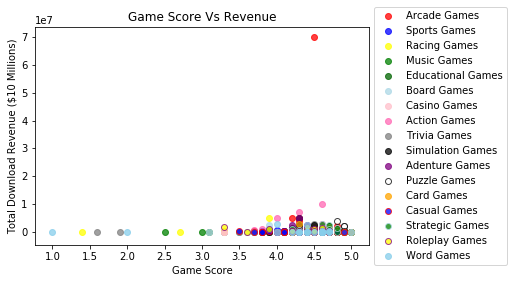

<Figure size 432x288 with 0 Axes>

In [38]:
#building scatter plots for each category
arcade_p = plt.scatter(arcade["Game Score"], arcade["Total Download Revenue ($)"], marker="o"
                       , label="Arcade Games", color="red", alpha=0.75)
sports_p = plt.scatter(sports["Game Score"], sports["Total Download Revenue ($)"], marker="o",
                        label="Sports Games", color="blue", alpha=0.75)
racing_p = plt.scatter(racing["Game Score"], racing["Total Download Revenue ($)"], marker="o",
                        label="Racing Games", color="yellow", alpha=0.75)
music_p = plt.scatter(music["Game Score"], music["Total Download Revenue ($)"], marker="o",
                        label="Music Games", color="green", alpha=0.75)
educational_p = plt.scatter(educational["Game Score"], educational["Total Download Revenue ($)"],
                            marker="o",label="Educational Games", color="darkgreen", alpha=0.75)
board_p = plt.scatter(board["Game Score"], board["Total Download Revenue ($)"], marker="o",
                       label="Board Games", color="lightblue", alpha=0.75)
casino_p = plt.scatter(casino["Game Score"], casino["Total Download Revenue ($)"], marker="o",
                       label="Casino Games", color="pink", alpha=0.75)
action_p = plt.scatter(action["Game Score"], action["Total Download Revenue ($)"], marker="o",
                       label="Action Games", color="hotpink", alpha=0.75)
trivia_p = plt.scatter(trivia["Game Score"], trivia["Total Download Revenue ($)"], marker="o",
                       label="Trivia Games", color="grey", alpha=0.75)
simulation_p = plt.scatter(simulation["Game Score"], simulation["Total Download Revenue ($)"], marker="o",
                       label="Simulation Games", color="black", alpha=0.75)
adventure_p = plt.scatter(adventure["Game Score"], adventure["Total Download Revenue ($)"], marker="o",
                       label="Adenture Games", color="purple", alpha=0.75)
puzzle_p = plt.scatter(puzzle["Game Score"], puzzle["Total Download Revenue ($)"], marker="o",
                        label="Puzzle Games", color="white", edgecolor="black",alpha=0.75)
card_p = plt.scatter(card["Game Score"], card["Total Download Revenue ($)"], marker="o",
                       label="Card Games", color="orange", alpha=0.75)
casual_p = plt.scatter(casual["Game Score"], casual["Total Download Revenue ($)"], marker="o",
                       label="Casual Games", color="blue",edgecolor="red", alpha=0.75)
strategy_p = plt.scatter(strategy["Game Score"], strategy["Total Download Revenue ($)"], marker="o",
                       label="Strategic Games", color="green", edgecolor="lightblue", alpha=0.75)
roleplay_p = plt.scatter(roleplay["Game Score"], roleplay["Total Download Revenue ($)"], marker="o",
                       label="Roleplay Games", color="yellow", edgecolor="purple", alpha=0.75)
word_p = plt.scatter(word["Game Score"], word["Total Download Revenue ($)"], marker="o",
                       label="Word Games", color="skyblue", alpha=0.75)

#labeling the graph
plt.xlabel("Game Score")
plt.ylabel("Total Download Revenue ($10 Millions)")
plt.title("Game Score Vs Revenue")
#plt.legend((arcade_p,sports_p,racing_p,music_p,educational_p,board_p,casino_p,action_p,trivia_p,simulation_p,
           #adventure_p,puzzle_p,card_p,casual_p,strategy_p,roleplay_p,word_p),
           #("Arcade","Sports","Racing","Music","Education","Board","Casino","Action","Trivia","Simulation",
           #"Adventure","Puzzle","Card","Casual","Strategic","Roleplay","Word"))
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
#plt.show()
#plt.savefig("GameScoreVsRevenue.png")


fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('GameScoreVsRevenue', bbox_inches="tight")

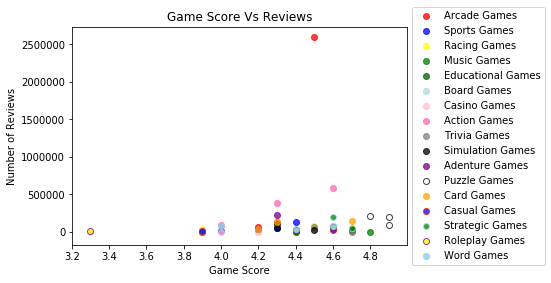

In [22]:
#building scatter plots for each category
arcade_p = plt.scatter(arcade["Game Score"], arcade["Number of Reviews"], marker="o"
                       , label="Arcade Games", color="red", alpha=0.75)
sports_p = plt.scatter(sports["Game Score"], sports["Number of Reviews"], marker="o",
                        label="Sports Games", color="blue", alpha=0.75)
racing_p = plt.scatter(racing["Game Score"], racing["Number of Reviews"], marker="o",
                        label="Racing Games", color="yellow", alpha=0.75)
music_p = plt.scatter(music["Game Score"], music["Number of Reviews"], marker="o",
                        label="Music Games", color="green", alpha=0.75)
educational_p = plt.scatter(educational["Game Score"], educational["Number of Reviews"],
                            marker="o",label="Educational Games", color="darkgreen", alpha=0.75)
board_p = plt.scatter(board["Game Score"], board["Number of Reviews"], marker="o",
                       label="Board Games", color="lightblue", alpha=0.75)
casino_p = plt.scatter(casino["Game Score"], casino["Number of Reviews"], marker="o",
                       label="Casino Games", color="pink", alpha=0.75)
action_p = plt.scatter(action["Game Score"], action["Number of Reviews"], marker="o",
                       label="Action Games", color="hotpink", alpha=0.75)
trivia_p = plt.scatter(trivia["Game Score"], trivia["Number of Reviews"], marker="o",
                       label="Trivia Games", color="grey", alpha=0.75)
simulation_p = plt.scatter(simulation["Game Score"], simulation["Number of Reviews"], marker="o",
                       label="Simulation Games", color="black", alpha=0.75)
adventure_p = plt.scatter(adventure["Game Score"], adventure["Number of Reviews"], marker="o",
                       label="Adenture Games", color="purple", alpha=0.75)
puzzle_p = plt.scatter(puzzle["Game Score"], puzzle["Number of Reviews"], marker="o",
                        label="Puzzle Games", color="white", edgecolor="black",alpha=0.75)
card_p = plt.scatter(card["Game Score"], card["Number of Reviews"], marker="o",
                       label="Card Games", color="orange", alpha=0.75)
casual_p = plt.scatter(casual["Game Score"], casual["Number of Reviews"], marker="o",
                       label="Casual Games", color="blue",edgecolor="red", alpha=0.75)
strategy_p = plt.scatter(strategy["Game Score"], strategy["Number of Reviews"], marker="o",
                       label="Strategic Games", color="green", edgecolor="lightblue", alpha=0.75)
roleplay_p = plt.scatter(roleplay["Game Score"], roleplay["Number of Reviews"], marker="o",
                       label="Roleplay Games", color="yellow", edgecolor="purple", alpha=0.75)
word_p = plt.scatter(word["Game Score"], word["Number of Reviews"], marker="o",
                       label="Word Games", color="skyblue", alpha=0.75)

#labeling the graph
plt.xlabel("Game Score")
plt.ylabel("Number of Reviews")
plt.title("Game Score Vs Reviews")
#plt.legend((arcade_p,sports_p,racing_p,music_p,educational_p,board_p,casino_p,action_p,trivia_p,simulation_p,
           #adventure_p,puzzle_p,card_p,casual_p,strategy_p,roleplay_p,word_p),
           #("Arcade","Sports","Racing","Music","Education","Board","Casino","Action","Trivia","Simulation",
           #"Adventure","Puzzle","Card","Casual","Strategic","Roleplay","Word"))
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))




In [23]:
##Scatter plots based on 'Games_df'###

#showing the data with a scatter plot

arcade = games_df.loc[games_df["Game Category"]=="GAME_ARCADE"]
sports = games_df.loc[games_df["Game Category"]=="GAME_SPORTS"]
racing = games_df.loc[games_df["Game Category"]=="GAME_RACING"]
music = games_df.loc[games_df["Game Category"]=="GAME_MUSIC"]
educational = games_df.loc[games_df["Game Category"]== "GAME_EDUCATIONAL"]
board = games_df.loc[games_df["Game Category"]=="GAME_BOARD"]
casino = games_df.loc[games_df["Game Category"]=="GAME_CASINO"]
action = games_df.loc[games_df["Game Category"]=="GAME_ACTION"]
trivia = games_df.loc[games_df["Game Category"]=="GAME_TRIVIA"]
simulation = games_df.loc[games_df["Game Category"]=="GAME_SIMULATION"]
adventure = games_df.loc[games_df["Game Category"]=="GAME_ADVENTURE"]
puzzle = games_df.loc[games_df["Game Category"]=="GAME_PUZZLE"]
card = games_df.loc[games_df["Game Category"]=="GAME_CARD"]
casual = games_df.loc[games_df["Game Category"]=="GAME_CASUAL"]
strategy = games_df.loc[games_df["Game Category"]=="GAME_STRATEGY"]                       
roleplay = games_df.loc[games_df["Game Category"]=="GAME_ROLE_PLAYING"]
word = games_df.loc[games_df["Game Category"]=="GAME_WORD"]

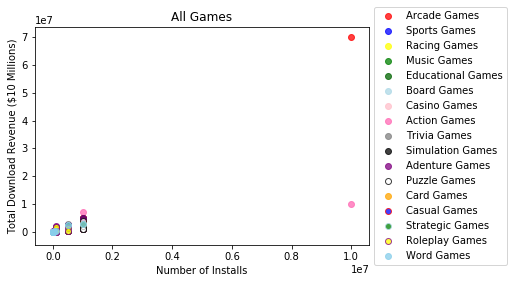

In [24]:
#building scatter plots for each category
arcade_p = plt.scatter(arcade["Number of Installs"], arcade["Total Download Revenue ($)"], marker="o"
                       , label="Arcade Games", color="red", alpha=0.75)
sports_p = plt.scatter(sports["Number of Installs"], sports["Total Download Revenue ($)"], marker="o",
                        label="Sports Games", color="blue", alpha=0.75)
racing_p = plt.scatter(racing["Number of Installs"], racing["Total Download Revenue ($)"], marker="o",
                        label="Racing Games", color="yellow", alpha=0.75)
music_p = plt.scatter(music["Number of Installs"], music["Total Download Revenue ($)"], marker="o",
                        label="Music Games", color="green", alpha=0.75)
educational_p = plt.scatter(educational["Number of Installs"], educational["Total Download Revenue ($)"],
                            marker="o",label="Educational Games", color="darkgreen", alpha=0.75)
board_p = plt.scatter(board["Number of Installs"], board["Total Download Revenue ($)"], marker="o",
                       label="Board Games", color="lightblue", alpha=0.75)
casino_p = plt.scatter(casino["Number of Installs"], casino["Total Download Revenue ($)"], marker="o",
                       label="Casino Games", color="pink", alpha=0.75)
action_p = plt.scatter(action["Number of Installs"], action["Total Download Revenue ($)"], marker="o",
                       label="Action Games", color="hotpink", alpha=0.75)
trivia_p = plt.scatter(trivia["Number of Installs"], trivia["Total Download Revenue ($)"], marker="o",
                       label="Trivia Games", color="grey", alpha=0.75)
simulation_p = plt.scatter(simulation["Number of Installs"], simulation["Total Download Revenue ($)"], marker="o",
                       label="Simulation Games", color="black", alpha=0.75)
adventure_p = plt.scatter(adventure["Number of Installs"], adventure["Total Download Revenue ($)"], marker="o",
                       label="Adenture Games", color="purple", alpha=0.75)
puzzle_p = plt.scatter(puzzle["Number of Installs"], puzzle["Total Download Revenue ($)"], marker="o",
                        label="Puzzle Games", color="white", edgecolor="black",alpha=0.75)
card_p = plt.scatter(card["Number of Installs"], card["Total Download Revenue ($)"], marker="o",
                       label="Card Games", color="orange", alpha=0.75)
casual_p = plt.scatter(casual["Number of Installs"], casual["Total Download Revenue ($)"], marker="o",
                       label="Casual Games", color="blue",edgecolor="red", alpha=0.75)
strategy_p = plt.scatter(strategy["Number of Installs"], strategy["Total Download Revenue ($)"], marker="o",
                       label="Strategic Games", color="green", edgecolor="lightblue", alpha=0.75)
roleplay_p = plt.scatter(roleplay["Number of Installs"], roleplay["Total Download Revenue ($)"], marker="o",
                       label="Roleplay Games", color="yellow", edgecolor="purple", alpha=0.75)
word_p = plt.scatter(word["Number of Installs"], word["Total Download Revenue ($)"], marker="o",
                       label="Word Games", color="skyblue", alpha=0.75)

#labeling the graph
plt.xlabel("Number of Installs")
plt.ylabel("Total Download Revenue ($10 Millions)")
plt.title("All Games")
#plt.legend((arcade_p,sports_p,racing_p,music_p,educational_p,board_p,casino_p,action_p,trivia_p,simulation_p,
           #adventure_p,puzzle_p,card_p,casual_p,strategy_p,roleplay_p,word_p),
           #("Arcade","Sports","Racing","Music","Education","Board","Casino","Action","Trivia","Simulation",
           #"Adventure","Puzzle","Card","Casual","Strategic","Roleplay","Word"))
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

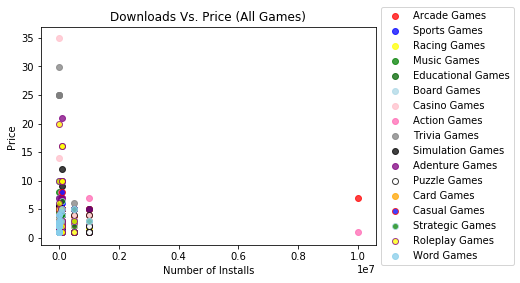

In [25]:
#building scatter plots for each category
arcade_p = plt.scatter(arcade["Number of Installs"], arcade["Price"], marker="o"
                       , label="Arcade Games", color="red", alpha=0.75)
sports_p = plt.scatter(sports["Number of Installs"], sports["Price"], marker="o",
                        label="Sports Games", color="blue", alpha=0.75)
racing_p = plt.scatter(racing["Number of Installs"], racing["Price"], marker="o",
                        label="Racing Games", color="yellow", alpha=0.75)
music_p = plt.scatter(music["Number of Installs"], music["Price"], marker="o",
                        label="Music Games", color="green", alpha=0.75)
educational_p = plt.scatter(educational["Number of Installs"], educational["Price"],
                            marker="o",label="Educational Games", color="darkgreen", alpha=0.75)
board_p = plt.scatter(board["Number of Installs"], board["Price"], marker="o",
                       label="Board Games", color="lightblue", alpha=0.75)
casino_p = plt.scatter(casino["Number of Installs"], casino["Price"], marker="o",
                       label="Casino Games", color="pink", alpha=0.75)
action_p = plt.scatter(action["Number of Installs"], action["Price"], marker="o",
                       label="Action Games", color="hotpink", alpha=0.75)
trivia_p = plt.scatter(trivia["Number of Installs"], trivia["Price"], marker="o",
                       label="Trivia Games", color="grey", alpha=0.75)
simulation_p = plt.scatter(simulation["Number of Installs"], simulation["Price"], marker="o",
                       label="Simulation Games", color="black", alpha=0.75)
adventure_p = plt.scatter(adventure["Number of Installs"], adventure["Price"], marker="o",
                       label="Adenture Games", color="purple", alpha=0.75)
puzzle_p = plt.scatter(puzzle["Number of Installs"], puzzle["Price"], marker="o",
                        label="Puzzle Games", color="white", edgecolor="black",alpha=0.75)
card_p = plt.scatter(card["Number of Installs"], card["Price"], marker="o",
                       label="Card Games", color="orange", alpha=0.75)
casual_p = plt.scatter(casual["Number of Installs"], casual["Price"], marker="o",
                       label="Casual Games", color="blue",edgecolor="red", alpha=0.75)
strategy_p = plt.scatter(strategy["Number of Installs"], strategy["Price"], marker="o",
                       label="Strategic Games", color="green", edgecolor="lightblue", alpha=0.75)
roleplay_p = plt.scatter(roleplay["Number of Installs"], roleplay["Price"], marker="o",
                       label="Roleplay Games", color="yellow", edgecolor="purple", alpha=0.75)
word_p = plt.scatter(word["Number of Installs"], word["Price"], marker="o",
                       label="Word Games", color="skyblue", alpha=0.75)

#labeling the graph
plt.xlabel("Number of Installs")
plt.ylabel("Price")
plt.title("Downloads Vs. Price (All Games)")
#plt.legend((arcade_p,sports_p,racing_p,music_p,educational_p,board_p,casino_p,action_p,trivia_p,simulation_p,
           #adventure_p,puzzle_p,card_p,casual_p,strategy_p,roleplay_p,word_p),
           #("Arcade","Sports","Racing","Music","Education","Board","Casino","Action","Trivia","Simulation",
           #"Adventure","Puzzle","Card","Casual","Strategic","Roleplay","Word"))
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))


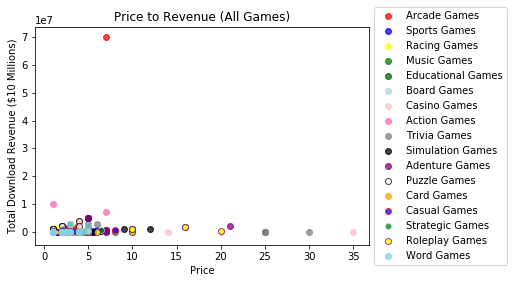

In [26]:
#building scatter plots for each category
arcade_p = plt.scatter(arcade["Price"], arcade["Total Download Revenue ($)"], marker="o"
                       , label="Arcade Games", color="red", alpha=0.75)
sports_p = plt.scatter(sports["Price"], sports["Total Download Revenue ($)"], marker="o",
                        label="Sports Games", color="blue", alpha=0.75)
racing_p = plt.scatter(racing["Price"], racing["Total Download Revenue ($)"], marker="o",
                        label="Racing Games", color="yellow", alpha=0.75)
music_p = plt.scatter(music["Price"], music["Total Download Revenue ($)"], marker="o",
                        label="Music Games", color="green", alpha=0.75)
educational_p = plt.scatter(educational["Price"], educational["Total Download Revenue ($)"],
                            marker="o",label="Educational Games", color="darkgreen", alpha=0.75)
board_p = plt.scatter(board["Price"], board["Total Download Revenue ($)"], marker="o",
                       label="Board Games", color="lightblue", alpha=0.75)
casino_p = plt.scatter(casino["Price"], casino["Total Download Revenue ($)"], marker="o",
                       label="Casino Games", color="pink", alpha=0.75)
action_p = plt.scatter(action["Price"], action["Total Download Revenue ($)"], marker="o",
                       label="Action Games", color="hotpink", alpha=0.75)
trivia_p = plt.scatter(trivia["Price"], trivia["Total Download Revenue ($)"], marker="o",
                       label="Trivia Games", color="grey", alpha=0.75)
simulation_p = plt.scatter(simulation["Price"], simulation["Total Download Revenue ($)"], marker="o",
                       label="Simulation Games", color="black", alpha=0.75)
adventure_p = plt.scatter(adventure["Price"], adventure["Total Download Revenue ($)"], marker="o",
                       label="Adenture Games", color="purple", alpha=0.75)
puzzle_p = plt.scatter(puzzle["Price"], puzzle["Total Download Revenue ($)"], marker="o",
                        label="Puzzle Games", color="white", edgecolor="black",alpha=0.75)
card_p = plt.scatter(card["Price"], card["Total Download Revenue ($)"], marker="o",
                       label="Card Games", color="orange", alpha=0.75)
casual_p = plt.scatter(casual["Price"], casual["Total Download Revenue ($)"], marker="o",
                       label="Casual Games", color="blue",edgecolor="red", alpha=0.75)
strategy_p = plt.scatter(strategy["Price"], strategy["Total Download Revenue ($)"], marker="o",
                       label="Strategic Games", color="green", edgecolor="lightblue", alpha=0.75)
roleplay_p = plt.scatter(roleplay["Price"], roleplay["Total Download Revenue ($)"], marker="o",
                       label="Roleplay Games", color="yellow", edgecolor="purple", alpha=0.75)
word_p = plt.scatter(word["Price"], word["Total Download Revenue ($)"], marker="o",
                       label="Word Games", color="skyblue", alpha=0.75)

#labeling the graph
plt.xlabel("Price")
plt.ylabel("Total Download Revenue ($10 Millions)")
plt.title("Price to Revenue (All Games)")
#plt.legend((arcade_p,sports_p,racing_p,music_p,educational_p,board_p,casino_p,action_p,trivia_p,simulation_p,
           #adventure_p,puzzle_p,card_p,casual_p,strategy_p,roleplay_p,word_p),
           #("Arcade","Sports","Racing","Music","Education","Board","Casino","Action","Trivia","Simulation",
           #"Adventure","Puzzle","Card","Casual","Strategic","Roleplay","Word"))
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.savefig("PriceVsRevenue.png")

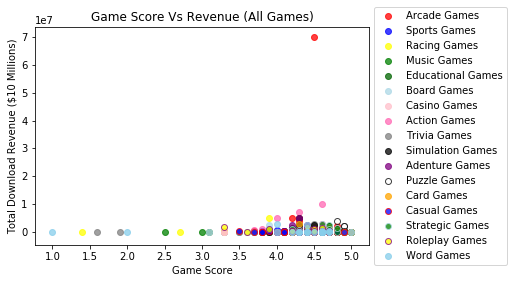

<Figure size 432x288 with 0 Axes>

In [27]:
#building scatter plots for each category
arcade_p = plt.scatter(arcade["Game Score"], arcade["Total Download Revenue ($)"], marker="o"
                       , label="Arcade Games", color="red", alpha=0.75)
sports_p = plt.scatter(sports["Game Score"], sports["Total Download Revenue ($)"], marker="o",
                        label="Sports Games", color="blue", alpha=0.75)
racing_p = plt.scatter(racing["Game Score"], racing["Total Download Revenue ($)"], marker="o",
                        label="Racing Games", color="yellow", alpha=0.75)
music_p = plt.scatter(music["Game Score"], music["Total Download Revenue ($)"], marker="o",
                        label="Music Games", color="green", alpha=0.75)
educational_p = plt.scatter(educational["Game Score"], educational["Total Download Revenue ($)"],
                            marker="o",label="Educational Games", color="darkgreen", alpha=0.75)
board_p = plt.scatter(board["Game Score"], board["Total Download Revenue ($)"], marker="o",
                       label="Board Games", color="lightblue", alpha=0.75)
casino_p = plt.scatter(casino["Game Score"], casino["Total Download Revenue ($)"], marker="o",
                       label="Casino Games", color="pink", alpha=0.75)
action_p = plt.scatter(action["Game Score"], action["Total Download Revenue ($)"], marker="o",
                       label="Action Games", color="hotpink", alpha=0.75)
trivia_p = plt.scatter(trivia["Game Score"], trivia["Total Download Revenue ($)"], marker="o",
                       label="Trivia Games", color="grey", alpha=0.75)
simulation_p = plt.scatter(simulation["Game Score"], simulation["Total Download Revenue ($)"], marker="o",
                       label="Simulation Games", color="black", alpha=0.75)
adventure_p = plt.scatter(adventure["Game Score"], adventure["Total Download Revenue ($)"], marker="o",
                       label="Adenture Games", color="purple", alpha=0.75)
puzzle_p = plt.scatter(puzzle["Game Score"], puzzle["Total Download Revenue ($)"], marker="o",
                        label="Puzzle Games", color="white", edgecolor="black",alpha=0.75)
card_p = plt.scatter(card["Game Score"], card["Total Download Revenue ($)"], marker="o",
                       label="Card Games", color="orange", alpha=0.75)
casual_p = plt.scatter(casual["Game Score"], casual["Total Download Revenue ($)"], marker="o",
                       label="Casual Games", color="blue",edgecolor="red", alpha=0.75)
strategy_p = plt.scatter(strategy["Game Score"], strategy["Total Download Revenue ($)"], marker="o",
                       label="Strategic Games", color="green", edgecolor="lightblue", alpha=0.75)
roleplay_p = plt.scatter(roleplay["Game Score"], roleplay["Total Download Revenue ($)"], marker="o",
                       label="Roleplay Games", color="yellow", edgecolor="purple", alpha=0.75)
word_p = plt.scatter(word["Game Score"], word["Total Download Revenue ($)"], marker="o",
                       label="Word Games", color="skyblue", alpha=0.75)

#labeling the graph
plt.xlabel("Game Score")
plt.ylabel("Total Download Revenue ($10 Millions)")
plt.title("Game Score Vs Revenue (All Games)")
#plt.legend((arcade_p,sports_p,racing_p,music_p,educational_p,board_p,casino_p,action_p,trivia_p,simulation_p,
           #adventure_p,puzzle_p,card_p,casual_p,strategy_p,roleplay_p,word_p),
           #("Arcade","Sports","Racing","Music","Education","Board","Casino","Action","Trivia","Simulation",
           #"Adventure","Puzzle","Card","Casual","Strategic","Roleplay","Word"))
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()
plt.savefig("GameScoreVsRevenue.png")


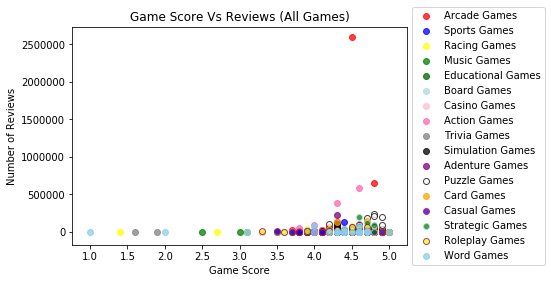

In [28]:
#building scatter plots for each category
arcade_p = plt.scatter(arcade["Game Score"], arcade["Number of Reviews"], marker="o"
                       , label="Arcade Games", color="red", alpha=0.75)
sports_p = plt.scatter(sports["Game Score"], sports["Number of Reviews"], marker="o",
                        label="Sports Games", color="blue", alpha=0.75)
racing_p = plt.scatter(racing["Game Score"], racing["Number of Reviews"], marker="o",
                        label="Racing Games", color="yellow", alpha=0.75)
music_p = plt.scatter(music["Game Score"], music["Number of Reviews"], marker="o",
                        label="Music Games", color="green", alpha=0.75)
educational_p = plt.scatter(educational["Game Score"], educational["Number of Reviews"],
                            marker="o",label="Educational Games", color="darkgreen", alpha=0.75)
board_p = plt.scatter(board["Game Score"], board["Number of Reviews"], marker="o",
                       label="Board Games", color="lightblue", alpha=0.75)
casino_p = plt.scatter(casino["Game Score"], casino["Number of Reviews"], marker="o",
                       label="Casino Games", color="pink", alpha=0.75)
action_p = plt.scatter(action["Game Score"], action["Number of Reviews"], marker="o",
                       label="Action Games", color="hotpink", alpha=0.75)
trivia_p = plt.scatter(trivia["Game Score"], trivia["Number of Reviews"], marker="o",
                       label="Trivia Games", color="grey", alpha=0.75)
simulation_p = plt.scatter(simulation["Game Score"], simulation["Number of Reviews"], marker="o",
                       label="Simulation Games", color="black", alpha=0.75)
adventure_p = plt.scatter(adventure["Game Score"], adventure["Number of Reviews"], marker="o",
                       label="Adenture Games", color="purple", alpha=0.75)
puzzle_p = plt.scatter(puzzle["Game Score"], puzzle["Number of Reviews"], marker="o",
                        label="Puzzle Games", color="white", edgecolor="black",alpha=0.75)
card_p = plt.scatter(card["Game Score"], card["Number of Reviews"], marker="o",
                       label="Card Games", color="orange", alpha=0.75)
casual_p = plt.scatter(casual["Game Score"], casual["Number of Reviews"], marker="o",
                       label="Casual Games", color="blue",edgecolor="red", alpha=0.75)
strategy_p = plt.scatter(strategy["Game Score"], strategy["Number of Reviews"], marker="o",
                       label="Strategic Games", color="green", edgecolor="lightblue", alpha=0.75)
roleplay_p = plt.scatter(roleplay["Game Score"], roleplay["Number of Reviews"], marker="o",
                       label="Roleplay Games", color="yellow", edgecolor="purple", alpha=0.75)
word_p = plt.scatter(word["Game Score"], word["Number of Reviews"], marker="o",
                       label="Word Games", color="skyblue", alpha=0.75)

#labeling the graph
plt.xlabel("Game Score")
plt.ylabel("Number of Reviews")
plt.title("Game Score Vs Reviews (All Games)")
#plt.legend((arcade_p,sports_p,racing_p,music_p,educational_p,board_p,casino_p,action_p,trivia_p,simulation_p,
           #adventure_p,puzzle_p,card_p,casual_p,strategy_p,roleplay_p,word_p),
           #("Arcade","Sports","Racing","Music","Education","Board","Casino","Action","Trivia","Simulation",
           #"Adventure","Puzzle","Card","Casual","Strategic","Roleplay","Word"))
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))


In [29]:
##########################


In [30]:
######Line Charts########
games_df.head(70)

,Game Title,Game Category,Game Score,Number of Reviews,Price,Number of Installs,Developer,Play Store URL,Total Download Revenue ($)
0,Grand Theft Auto: San Andreas,GAME_ACTION,4.3,387831,6.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...,6990000.0
1,Five Nights at Freddy's,GAME_ACTION,4.6,103823,2.99,1000000,Scott Cawthon,https://play.google.com/store/apps/details?id=...,2990000.0
2,Hitman Sniper,GAME_ACTION,4.6,592059,0.99,10000000,SQUARE ENIX Ltd,https://play.google.com/store/apps/details?id=...,9900000.0
3,Five Nights at Freddy's: SL,GAME_ACTION,4.5,17363,2.99,100000,Scott Cawthon,https://play.google.com/store/apps/details?id=...,299000.0
4,Assassin's Creed Identity,GAME_ACTION,3.8,50015,1.99,500000,Ubisoft Entertainment,https://play.google.com/store/apps/details?id=...,995000.0
5,Space Marshals,GAME_ACTION,4.8,7921,0.99,50000,Pixelbite,https://play.google.com/store/apps/details?id=...,49500.0
6,Five Nights at Freddy's 4,GAME_ACTION,4.6,21575,2.99,100000,Scott Cawthon,https://play.google.com/store/apps/details?id=...,299000.0
7,Grand Theft Auto III,GAME_ACTION,4.0,96667,4.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...,4990000.0
8,Call of Duty:Black Ops Zombies,GAME_ACTION,4.2,14005,6.99,100000,"Activision Publishing, Inc.",https://play.google.com/store/apps/details?id=...,699000.0
9,truTV Impractical Jokers Wheel of Doom,GAME_ACTION,4.3,168,2.99,5000,truTVnetwork,https://play.google.com/store/apps/details?id=...,14950.0


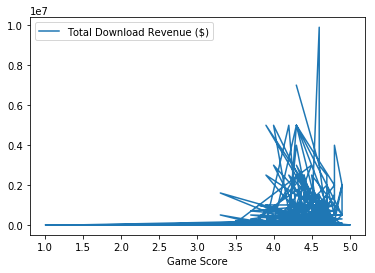

In [31]:
# Line graph 'Game Score' Vs 'Revenue'. 
####MESSY LOOKING####
#Below is with Minecraft
#games_df.plot(x='Game Score', y='Total Download Revenue ($)')
#Below is withOUT Minecraft
games_df.drop([50]).plot(x='Game Score', y='Total Download Revenue ($)')


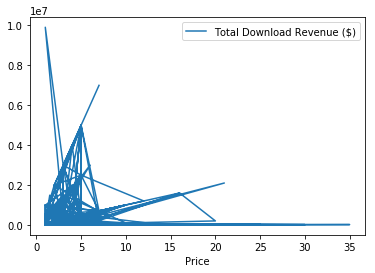

In [32]:
# Line graph 'Price' Vs 'Revenue'
#Below is with Minecraft
#games_df.plot(x='Price', y='Total Download Revenue ($)')
#Below is withOUT Minecraft
games_df.drop([50]).plot(x='Price', y='Total Download Revenue ($)')


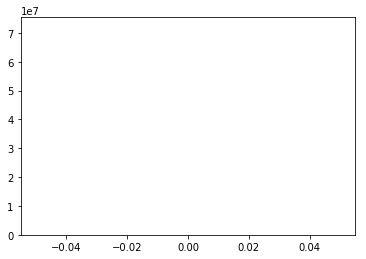

In [33]:
###Stacked chart

arcade = games_df.loc[games_df["Game Category"]=="GAME_ARCADE"]
sports = games_df.loc[games_df["Game Category"]=="GAME_SPORTS"]
racing = games_df.loc[games_df["Game Category"]=="GAME_RACING"]
music = games_df.loc[games_df["Game Category"]=="GAME_MUSIC"]
educational = games_df.loc[games_df["Game Category"]== "GAME_EDUCATIONAL"]
board = games_df.loc[games_df["Game Category"]=="GAME_BOARD"]
casino = games_df.loc[games_df["Game Category"]=="GAME_CASINO"]
action = games_df.loc[games_df["Game Category"]=="GAME_ACTION"]
trivia = games_df.loc[games_df["Game Category"]=="GAME_TRIVIA"]
simulation = games_df.loc[games_df["Game Category"]=="GAME_SIMULATION"]
adventure = games_df.loc[games_df["Game Category"]=="GAME_ADVENTURE"]
puzzle = games_df.loc[games_df["Game Category"]=="GAME_PUZZLE"]
card = games_df.loc[games_df["Game Category"]=="GAME_CARD"]
casual = games_df.loc[games_df["Game Category"]=="GAME_CASUAL"]
strategy = games_df.loc[games_df["Game Category"]=="GAME_STRATEGY"]                       
roleplay = games_df.loc[games_df["Game Category"]=="GAME_ROLE_PLAYING"]
word = games_df.loc[games_df["Game Category"]=="GAME_WORD"]




x = range(0, 1)
#x= games_df['Price']
y1 = arcade['Total Download Revenue ($)']
y2= sports['Total Download Revenue ($)']
y3 = racing['Total Download Revenue ($)']
plt.stackplot(x, y1, y2, y3)
#df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
#df.plot.area()
